# Import and Upload

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# upload
uploaded = files.upload()

Saving Household_debt_yearly_agg.csv to Household_debt_yearly_agg.csv


# Household Debt - yearly

In [3]:
df_debt = pd.read_csv('Household_debt_yearly_agg.csv')
df_debt.head()

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT
0,2024-03-23,Chile,2006,2006-12-31,26.392439,0.032722
1,2024-03-23,Chile,2007,2007-12-31,29.027133,0.048319
2,2024-03-23,Chile,2008,2008-12-31,32.631886,0.057514
3,2024-03-23,Chile,2009,2009-12-31,33.905979,0.065448
4,2024-03-23,Chile,2010,2010-12-31,32.583076,0.094427


In [4]:
# check if there is missing value
is_na_present = df_debt.isna().any().any()
print(f"There is any NA values in the DataFrame - {is_na_present}")

There is any NA values in the DataFrame - False


In [5]:
df_debt.dtypes

EXTRACTIONDATE          object
COUNTRY                 object
YEAR                     int64
DATE                    object
Debt(%GDP)             float64
LIKELIHOODOFDEFAULT    float64
dtype: object

In [6]:
# pick only Debt and Default Likelihood
df_debt_corr = df_debt[['Debt(%GDP)', 'LIKELIHOODOFDEFAULT']]
df_debt_corr.head()

,Debt(%GDP),LIKELIHOODOFDEFAULT
0,26.392439,0.032722
1,29.027133,0.048319
2,32.631886,0.057514
3,33.905979,0.065448
4,32.583076,0.094427


Basic Visualization

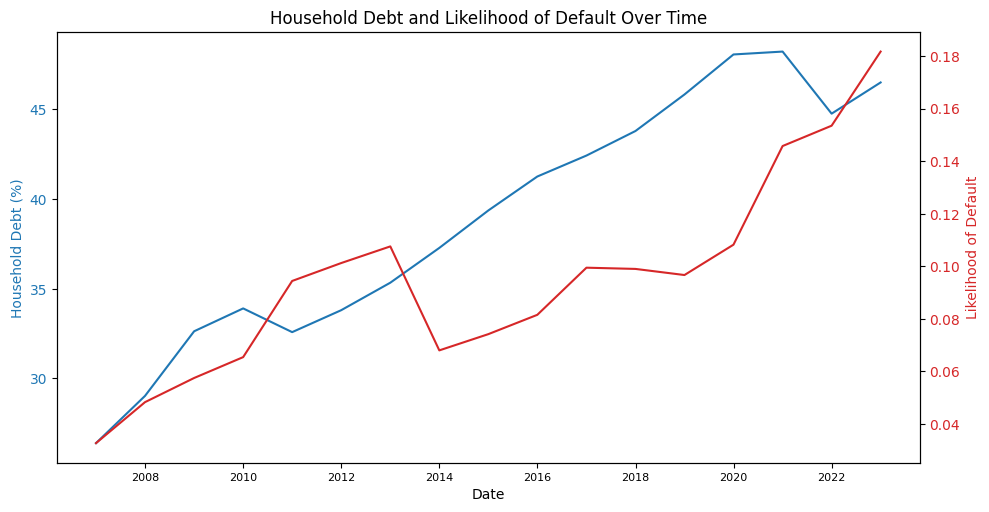

In [7]:
# Household Debt and Likelihood of Default Over Time

# Convert 'Date' column to datetime format
df_debt['DATE'] = pd.to_datetime(df_debt['DATE'])

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Household Debt (%)', color=color)
ax1.plot(df_debt['DATE'], df_debt['Debt(%GDP)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.tick_params(axis='x', labelsize=8)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Likelihood of Default', color=color)  # We already handled the x-label with ax1
ax2.plot(df_debt['DATE'], df_debt['LIKELIHOODOFDEFAULT'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure tight layout so labels are not cut off
plt.title('Household Debt and Likelihood of Default Over Time')
plt.xticks(rotation=45)
plt.show()

Regression

In [8]:
# Compute the Pearson correlation coefficient
corr_coef = np.corrcoef(df_debt_corr['Debt(%GDP)'], df_debt_corr['LIKELIHOODOFDEFAULT'])[0, 1]

# Prepare data for OLS regression
X = df_debt_corr['Debt(%GDP)']
X = sm.add_constant(X)  # adding a constant to the model
y = df_debt_corr['LIKELIHOODOFDEFAULT']

# Fit OLS model
debt_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(debt_model.summary())

                             OLS Regression Results                            
Dep. Variable:     LIKELIHOODOFDEFAULT   R-squared:                       0.575
Model:                             OLS   Adj. R-squared:                  0.546
Method:                  Least Squares   F-statistic:                     20.27
Date:                 Tue, 02 Apr 2024   Prob (F-statistic):           0.000421
Time:                         23:52:51   Log-Likelihood:                 39.072
No. Observations:                   17   AIC:                            -74.14
Df Residuals:                       15   BIC:                            -72.48
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0701      0.037     -1.88

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
# Print the result
print(f"Model Pearson Correlation Coefficient: {corr_coef}")
print("Model R-squared: {:.3f}".format(debt_model.rsquared))

print("\nModel Coefficients:")
print(f"Intercept: {debt_model.params[0]:.3f}")
print(f"Slope (Household Debt): {debt_model.params[1]:.3f}")

print("\nModel P-values:")
print(f"P-value (Intercept): {debt_model.pvalues[0]:.3f}")
print(f"P-value (Household Debt): {debt_model.pvalues[1]:.3f}")

print("\nModel Standard Errors:")
print(f"Standard Error (Intercept): {debt_model.bse[0]:.3f}")
print(f"Standard Error (Household Debt): {debt_model.bse[1]:.3f}")

Model Pearson Correlation Coefficient: 0.7581251368700894
Model R-squared: 0.575

Model Coefficients:
Intercept: -0.070
Slope (Household Debt): 0.004

Model P-values:
P-value (Intercept): 0.079
P-value (Household Debt): 0.000

Model Standard Errors:
Standard Error (Intercept): 0.037
Standard Error (Household Debt): 0.001


Regression Visualization

In [10]:
sns.set_style("whitegrid")

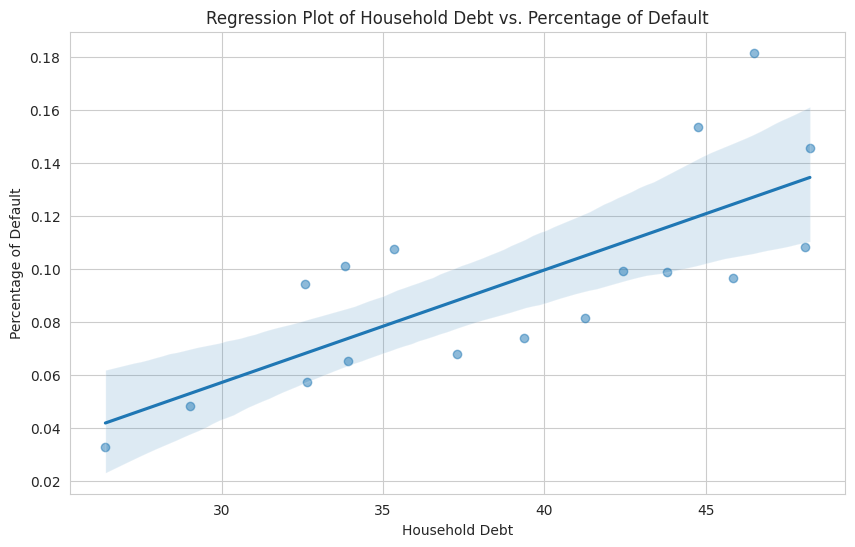

In [11]:
# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Debt(%GDP)', y='LIKELIHOODOFDEFAULT', data=df_debt_corr, scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Household Debt vs. Percentage of Default')
plt.xlabel('Household Debt')
plt.ylabel('Percentage of Default')
plt.show()

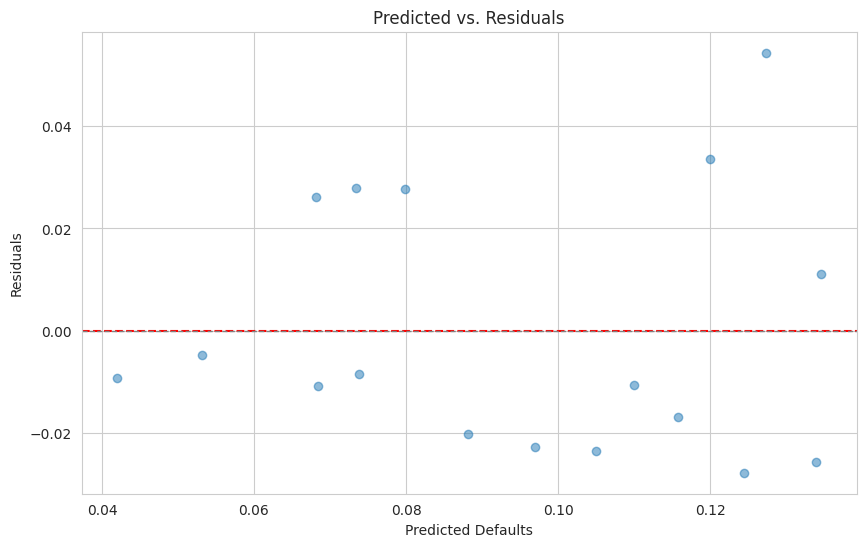

In [12]:
# Residual Plot
residuals = debt_model.resid
predicted = debt_model.fittedvalues

# Creating the plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.xlabel('Predicted Defaults')
plt.ylabel('Residuals')

# Adding a zero line for reference
plt.axhline(0, linestyle='--', color='grey', linewidth=1)

plt.show()

Autocorrelation and Partial Autocorrelation Visualization

<Figure size 1000x600 with 0 Axes>

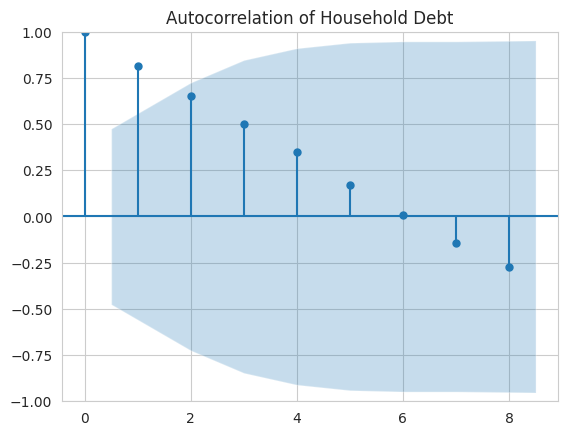

<Figure size 1000x600 with 0 Axes>

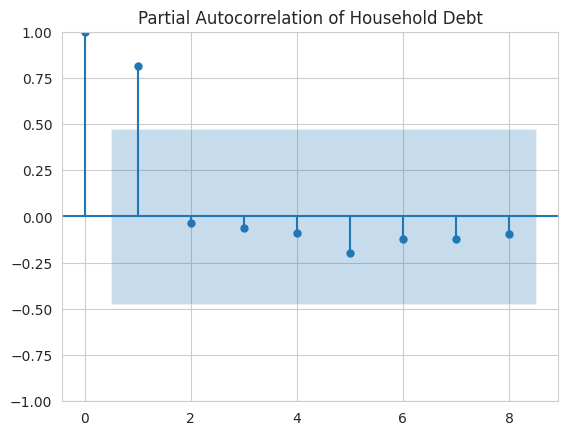

In [13]:
# Autocorrelation and Partial Autocorrelation
df_debt.set_index('DATE', inplace=True)

# Autocorrelation Plot for Household Debt
plt.figure(figsize=(10, 6))
plot_acf(df_debt['Debt(%GDP)'], lags=8)
plt.title('Autocorrelation of Household Debt')
plt.show()

# Partial Autocorrelation Plot for Household Debt
plt.figure(figsize=(10, 6))
plot_pacf(df_debt['Debt(%GDP)'], lags=8, method='ywm')
plt.title('Partial Autocorrelation of Household Debt')
plt.show()

<Figure size 1000x600 with 0 Axes>

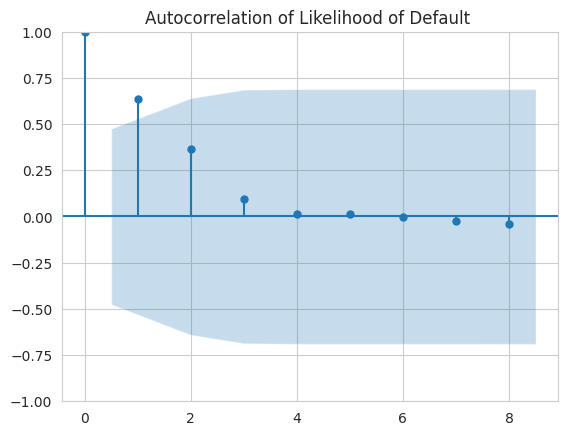

<Figure size 1000x600 with 0 Axes>

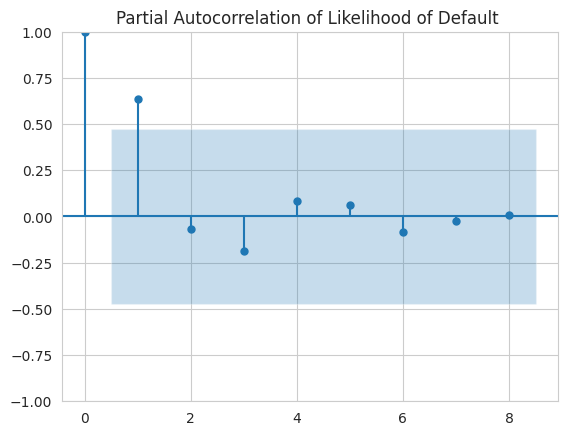

In [14]:
# Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_acf(df_debt['LIKELIHOODOFDEFAULT'], lags=8)
plt.title('Autocorrelation of Likelihood of Default ')
plt.show()

# Partial Autocorrelation Plot for Likelihood of Default
plt.figure(figsize=(10, 6))
plot_pacf(df_debt['LIKELIHOODOFDEFAULT'], lags=8, method='ywm')
plt.title('Partial Autocorrelation of Likelihood of Default ')
plt.show()